In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd "C:\Users\admin\Desktop"

C:\Users\admin\Desktop


In [3]:
data1 = pd.read_csv('insurance.csv')
print(data1.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Variable identification

In [4]:
data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
Y = data1["charges"]
X = data1.drop(["charges"],axis = 1)
print(X.head())
print(Y.head())

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


# univariate analysis

In [7]:
 data1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data2 = data1.drop(['sex','smoker','region'],axis =1)
print(data2.head())

   age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520


# continuous data

# histogram plot

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


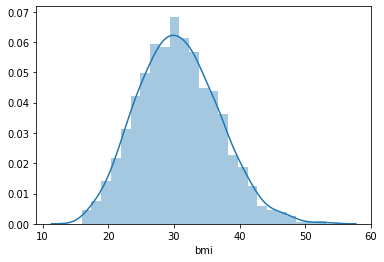

In [9]:
sns.distplot(data2['bmi'] )
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


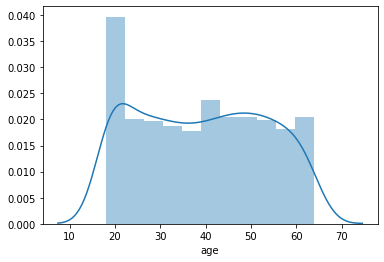

In [10]:
sns.distplot(data2['age'])
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


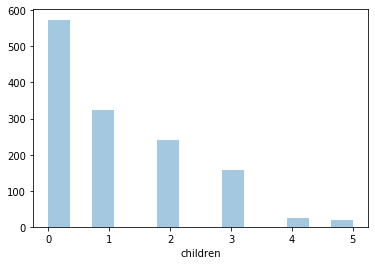

In [11]:
sns.distplot(data2['children'],kde = False)
plt.show()

# box plot

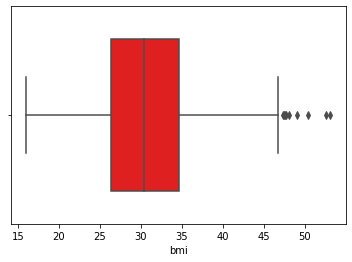

In [12]:
sns.boxplot(x = data2['bmi'],palette = 'brg',width = 0.7)
plt.show()

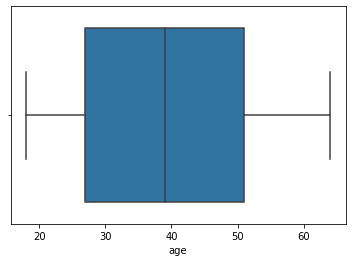

In [13]:
sns.boxplot(data2['age'])
plt.show()

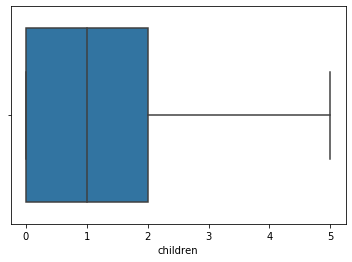

In [14]:
sns.boxplot(data2['children'])
plt.show()

In [15]:
(data2['bmi'] > 46).sum()

16

# categorical data

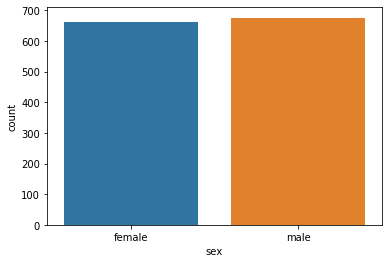

In [16]:
sns.countplot(x = data1['sex'])
plt.show()

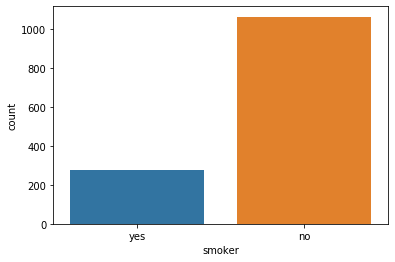

In [17]:
sns.countplot(x = data1['smoker'])
plt.show()

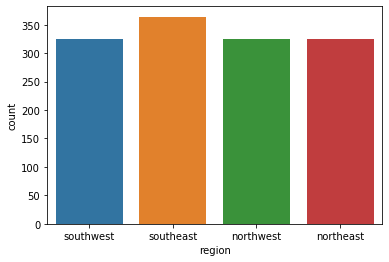

In [18]:
sns.countplot(x = data1['region'])
plt.show()

# bivariate analysis 

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['sex'] = le.fit_transform(data1['sex'])
data1['smoker'] = le.fit_transform(data1['smoker'])
data1['region'] = le.fit_transform(data1['region'])
print(data1.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [20]:
corr1 = data1.corr()
print(corr1)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


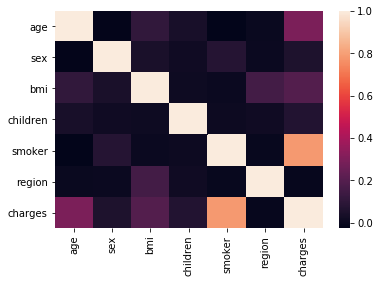

In [21]:
sns.heatmap(corr1)
plt.show()

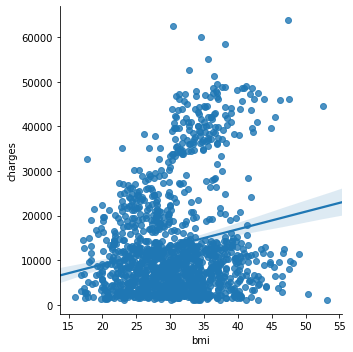

In [22]:
sns.lmplot(x = 'bmi',y = 'charges',data = data2)
plt.show()

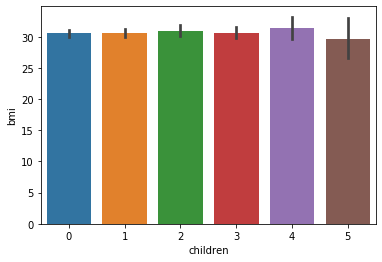

In [53]:
sns.barplot(y = 'bmi',x = 'children',data = data1)
plt.show()

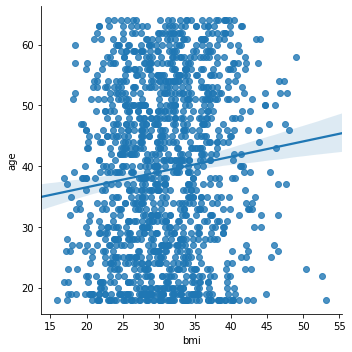

In [24]:
sns.lmplot(x = 'bmi',y = 'age',data = data1)
plt.show()

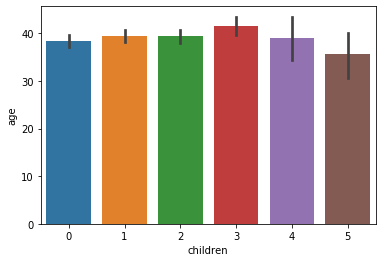

In [52]:
sns.barplot(x = 'children',y = 'age',data = data1)
plt.show()

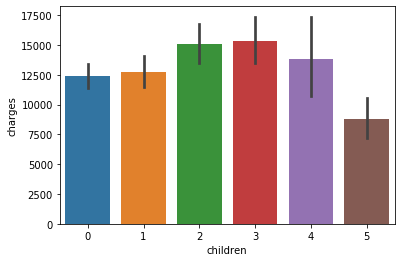

In [51]:
sns.barplot(x = 'children',y = 'charges',data = data1)
plt.show()

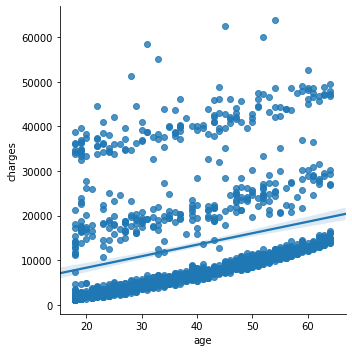

In [27]:
sns.lmplot(x = 'age',y = 'charges',data = data1)
plt.show()

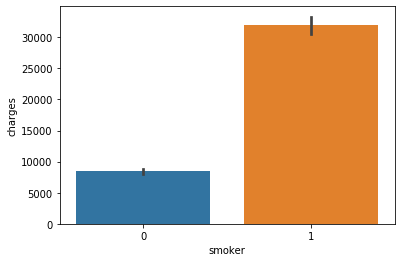

In [28]:
sns.barplot(x = 'smoker',y = 'charges',data = data1)
plt.show()

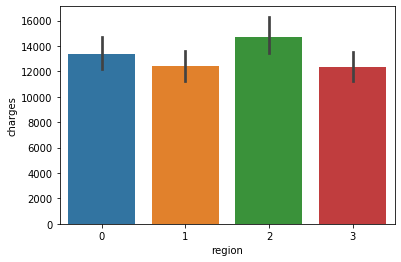

In [29]:
sns.barplot(x = 'region',y = 'charges',data = data1)
plt.show()

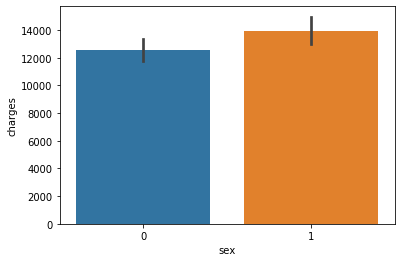

In [30]:
sns.barplot(x = 'sex',y = 'charges',data = data1)
plt.show()

# model building

In [44]:
y_data1 = data1['charges']
X_data1 = data1.drop(['charges'],axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data1, y_data1, test_size = 0.25, random_state = 0)

random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
regr1 = RandomForestRegressor(n_estimators= 135, min_samples_split= 14, max_features= 3, max_depth = 4 ,random_state = 0,criterion = 'mse')
regr1.fit(X_train,y_train)
print(regr1.score(X_test,y_test))

0.8861849615341635


decision tree

In [46]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth= 4, max_features= 4, min_samples_leaf =  9, min_samples_split= 16,random_state = 0)
clf.fit(X_train,y_train)
print(cle.score(X_test,y_test))

0.8787801916343327


In [50]:
from sklearn import metrics
y_pred1 = regr1.predict(X_test)
y_pred2 = clf.predict(X_test)
y_predict = 0.5*y_pred1 + 0.5*y_pred2
metrics.r2_score(y_predict,y_test)

0.864152640192613